## Pycaret이란?
- pycaret이란 AutoML을 하게 해주는 파이썬 라이브러리입니다. 
- scikit-learn 패키지를 기반으로 하고 있으며 Classification, Regression, Clustering, Anomaly Detection 등등 다양한 모델을 지원합니다. 

## 1. 데이터셋 준비

In [1]:
from pycaret.datasets import get_data 
dataset = get_data('juice')

,Id,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,1,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,2,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,3,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,4,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,5,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0


## 2. 주어진 데이터 세트를 가지고 sutup

- setup()이라는 강력한 함수로 추후에 필요한 모든 환경을 initialize 해준다.  
- feature column과 label column이 같이 있는 pandas dataframe에서 target이라는 파라미터에 label column 이름을 입력합니다.

In [2]:
from pycaret.classification import *
setup_clf = setup(data=dataset, target='Purchase')

,Description,Value
0,Session id,2548
1,Target,Purchase
2,Target type,Binary
3,Target mapping,"CH: 0, MM: 1"
4,Original data shape,"(1070, 19)"
5,Transformed data shape,"(1070, 19)"
6,Transformed train set shape,"(749, 19)"
7,Transformed test set shape,"(321, 19)"
8,Ordinal features,1
9,Numeric features,17


## 3 모델 생성하기

### 모델 정보 확인 

In [3]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


## 3-1 . 하나 모델 생성
- 모델이름 지정
- fold는 데이터셋을 5개로 나누어 cross validation하는 것을 의미합니다. create_model() 함수는 선언과 동시에 바로 학습하고 결과

In [4]:
rf = create_model('rf', fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8067,0.8830,0.7759,0.7377,0.7563,0.5963,0.5968
1,0.8267,0.8811,0.8448,0.7424,0.7903,0.6436,0.6475
2,0.8267,0.8733,0.6780,0.8511,0.7547,0.6233,0.6330
3,0.7867,0.8866,0.6441,0.7755,0.7037,0.5393,0.5449
4,0.7785,0.8531,0.7241,0.7119,0.7179,0.5357,0.5357
Mean,0.8050,0.8754,0.7334,0.7637,0.7446,0.5876,0.5916
Std,0.0199,0.0120,0.0712,0.0481,0.0307,0.0437,0.0451


## 3-2 여러 모델 생성 

- compare_models()라는 함수로 지원하는 대부분의 ML모델들을 자동으로 학습하여 결과를 띄워줍니다. 
- 이때 파라미터로 원하는 metric으로 정렬을 할 수 있고, 사용을 원하는 모델의 개수를 지정해 줄 수 있습니다.

In [6]:
top5 = compare_models(sort='AUC', n_select=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8345,0.8962,0.7503,0.8129,0.7787,0.6469,0.6500,0.0690
lda,Linear Discriminant Analysis,0.8344,0.8961,0.7776,0.7972,0.7852,0.6506,0.6531,0.0650
gbc,Gradient Boosting Classifier,0.8210,0.8887,0.7571,0.7847,0.7679,0.6226,0.6257,0.0770
catboost,CatBoost Classifier,0.8091,0.8881,0.7432,0.7679,0.7512,0.5967,0.6009,0.0670
rf,Random Forest Classifier,0.8037,0.8808,0.7363,0.7600,0.7455,0.5860,0.5887,0.0760
ada,Ada Boost Classifier,0.8023,0.8786,0.6918,0.7851,0.7335,0.5772,0.5820,0.0700
lightgbm,Light Gradient Boosting Machine,0.8130,0.8767,0.7366,0.7800,0.7552,0.6044,0.6075,0.0750
xgboost,Extreme Gradient Boosting,0.8010,0.8683,0.7297,0.7580,0.7409,0.5797,0.5827,0.0720
et,Extra Trees Classifier,0.7757,0.8544,0.6948,0.7246,0.7078,0.5259,0.5277,0.0830
nb,Naive Bayes,0.7543,0.8202,0.7570,0.6675,0.7073,0.4977,0.5029,0.0650


# 4. 모델 Tuning

## 하나 모델 튜닝

In [7]:
tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8800,0.9520,0.9310,0.7941,0.8571,0.7548,0.7619
1,0.7600,0.8276,0.7586,0.6667,0.7097,0.5066,0.5097
2,0.8267,0.9160,0.8276,0.7500,0.7869,0.6414,0.6436
3,0.8400,0.9205,0.9310,0.7297,0.8182,0.6790,0.6951
4,0.8533,0.8778,0.7931,0.8214,0.8070,0.6888,0.6891
5,0.8533,0.9280,0.7931,0.8214,0.8070,0.6888,0.6891
6,0.8400,0.9250,0.8276,0.7742,0.8000,0.6669,0.6679
7,0.8133,0.9067,0.7333,0.7857,0.7586,0.6067,0.6077
8,0.7467,0.8248,0.7667,0.6571,0.7077,0.4865,0.4910


Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=10, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.005, min_samples_leaf=3,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=90, n_jobs=-1, oob_score=False,
                       random_state=2548, verbose=0, warm_start=False)

## 여러 모델 튜닝

In [8]:
top5

[LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=1000,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=2548, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                            priors=None, shrinkage=None, solver='svd',
                            store_covariance=False, tol=0.0001),
 GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.1, loss='log_loss', max_depth=3,
                            max_features=None, max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_samples_leaf=1,
                            min_samples_split=2, min_weight_fraction_leaf=0.0,
                            n_estimators=100, n_iter_no_change=None,
         

In [19]:
tuned_top4 = []

In [21]:
tuned_top4.append(tune_model(top5[0]))

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8133,0.0000,0.7931,0.7419,0.7667,0.6114,0.6123
1,0.9333,0.0000,0.9310,0.9000,0.9153,0.8603,0.8607
2,0.7600,0.0000,0.6897,0.6897,0.6897,0.4940,0.4940
3,0.8133,0.0000,0.6897,0.8000,0.7407,0.5962,0.6002
4,0.7867,0.0000,0.7586,0.7097,0.7333,0.5559,0.5567
5,0.8800,0.0000,0.8276,0.8571,0.8421,0.7454,0.7457
6,0.9200,0.0000,0.7931,1.0000,0.8846,0.8246,0.8376
7,0.8267,0.0000,0.6667,0.8696,0.7547,0.6243,0.6375
8,0.8133,0.0000,0.8333,0.7353,0.7812,0.6196,0.6233


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [22]:
tuned_top4.append(tune_model(top5[2]))

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8267,0.8516,0.7586,0.7857,0.7719,0.6322,0.6325
1,0.9333,0.9768,0.9310,0.9000,0.9153,0.8603,0.8607
2,0.7600,0.8606,0.6897,0.6897,0.6897,0.4940,0.4940
3,0.8000,0.8891,0.6552,0.7917,0.7170,0.5645,0.5705
4,0.7600,0.8531,0.7241,0.6774,0.7000,0.5004,0.5011
5,0.8800,0.9348,0.8276,0.8571,0.8421,0.7454,0.7457
6,0.9467,0.9888,0.8621,1.0000,0.9259,0.8846,0.8906
7,0.8400,0.9096,0.6667,0.9091,0.7692,0.6512,0.6695
8,0.8133,0.8881,0.8333,0.7353,0.7812,0.6196,0.6233


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [24]:
tuned_top4.append(tune_model(top5[3]))

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8267,0.8553,0.7241,0.8077,0.7636,0.6274,0.6298
1,0.9200,0.9828,0.9310,0.8710,0.9000,0.8335,0.8347
2,0.8267,0.8576,0.6897,0.8333,0.7547,0.6225,0.6292
3,0.7600,0.8598,0.5517,0.7619,0.6400,0.4668,0.4805
4,0.7333,0.8508,0.6207,0.6667,0.6429,0.4305,0.4312
5,0.8800,0.9385,0.8621,0.8333,0.8475,0.7486,0.7489
6,0.8800,0.9843,0.6897,1.0000,0.8163,0.7316,0.7595
7,0.8000,0.8970,0.6667,0.8000,0.7273,0.5714,0.5774
8,0.8000,0.8852,0.8000,0.7273,0.7619,0.5902,0.5922


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [25]:
tuned_top4.append(tune_model(top5[4]))

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8133,0.8351,0.7931,0.7419,0.7667,0.6114,0.6123
1,0.9200,0.9505,0.9310,0.8710,0.9000,0.8335,0.8347
2,0.8000,0.8463,0.7241,0.7500,0.7368,0.5756,0.5759
3,0.7733,0.8381,0.6897,0.7143,0.7018,0.5190,0.5193
4,0.7600,0.8403,0.6552,0.7037,0.6786,0.4875,0.4883
5,0.8933,0.9460,0.8966,0.8387,0.8667,0.7779,0.7791
6,0.9333,0.9745,0.8276,1.0000,0.9057,0.8548,0.8640
7,0.8400,0.9044,0.7333,0.8462,0.7857,0.6591,0.6634
8,0.7867,0.8696,0.8000,0.7059,0.7500,0.5652,0.5686


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [9]:
tuned_top5 = [tune_model(i) for i in top5 ]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8933,0.9453,0.8966,0.8387,0.8667,0.7779,0.7791
1,0.7733,0.8141,0.6552,0.7308,0.6909,0.5128,0.5147
2,0.8400,0.9175,0.7931,0.7931,0.7931,0.6627,0.6627
3,0.8800,0.9235,0.8966,0.8125,0.8525,0.7517,0.7543
4,0.8267,0.8861,0.7241,0.8077,0.7636,0.6274,0.6298
5,0.8800,0.9333,0.7586,0.9167,0.8302,0.7387,0.7466
6,0.8800,0.9340,0.7931,0.8846,0.8364,0.7421,0.7448
7,0.8400,0.9148,0.7667,0.8214,0.7931,0.6629,0.6640
8,0.7467,0.8193,0.7000,0.6774,0.6885,0.4751,0.4753


Fitting 10 folds for each of 10 candidates, totalling 100 fits


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6933,0.7061,0.4483,0.6500,0.5306,0.3141,0.3261
1,0.7600,0.7931,0.5172,0.7895,0.6250,0.4596,0.4818
2,0.6800,0.7076,0.3448,0.6667,0.4545,0.2593,0.2875
3,0.6400,0.6874,0.3793,0.5500,0.4490,0.1948,0.2023
4,0.6000,0.6874,0.3793,0.4783,0.4231,0.1231,0.1251
5,0.6533,0.6942,0.3103,0.6000,0.4091,0.1975,0.2190
6,0.6667,0.7174,0.3793,0.6111,0.4681,0.2443,0.2590
7,0.6267,0.5904,0.2000,0.6000,0.3000,0.1250,0.1601
8,0.6533,0.6793,0.3000,0.6429,0.4091,0.2073,0.2375


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8533,0.9483,0.8276,0.8000,0.8136,0.6927,0.6930
1,0.7333,0.8268,0.6552,0.6552,0.6552,0.4378,0.4378
2,0.8400,0.9160,0.7931,0.7931,0.7931,0.6627,0.6627
3,0.8800,0.9063,0.8621,0.8333,0.8475,0.7486,0.7489
4,0.8400,0.8846,0.7241,0.8400,0.7778,0.6538,0.6582
5,0.8400,0.9295,0.6897,0.8696,0.7692,0.6493,0.6595
6,0.8533,0.9115,0.7241,0.8750,0.7925,0.6806,0.6879
7,0.8267,0.8941,0.7667,0.7931,0.7797,0.6369,0.6371
8,0.7467,0.8315,0.6667,0.6897,0.6780,0.4693,0.4695


Fitting 10 folds for each of 10 candidates, totalling 100 fits


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8933,0.9558,0.9310,0.8182,0.8710,0.7807,0.7854
1,0.7733,0.8306,0.7586,0.6875,0.7213,0.5311,0.5329
2,0.8400,0.9115,0.8276,0.7742,0.8000,0.6669,0.6679
3,0.8533,0.9033,0.8621,0.7812,0.8197,0.6966,0.6990
4,0.8133,0.8834,0.6897,0.8000,0.7407,0.5962,0.6002
5,0.8267,0.9145,0.6552,0.8636,0.7451,0.6175,0.6310
6,0.8400,0.9033,0.6552,0.9048,0.7600,0.6445,0.6634
7,0.8400,0.9022,0.7667,0.8214,0.7931,0.6629,0.6640
8,0.7333,0.8222,0.7000,0.6562,0.6774,0.4505,0.4512


Fitting 10 folds for each of 10 candidates, totalling 100 fits


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8800,0.9520,0.9310,0.7941,0.8571,0.7548,0.7619
1,0.7600,0.8276,0.7586,0.6667,0.7097,0.5066,0.5097
2,0.8267,0.9160,0.8276,0.7500,0.7869,0.6414,0.6436
3,0.8400,0.9205,0.9310,0.7297,0.8182,0.6790,0.6951
4,0.8533,0.8778,0.7931,0.8214,0.8070,0.6888,0.6891
5,0.8533,0.9280,0.7931,0.8214,0.8070,0.6888,0.6891
6,0.8400,0.9250,0.8276,0.7742,0.8000,0.6669,0.6679
7,0.8133,0.9067,0.7333,0.7857,0.7586,0.6067,0.6077
8,0.7467,0.8248,0.7667,0.6571,0.7077,0.4865,0.4910


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [10]:
tuned_top5

[LogisticRegression(C=9.459, class_weight={}, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=1000,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=2548, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                            priors=None, shrinkage=None, solver='svd',
                            store_covariance=False, tol=0.0001),
 GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.1, loss='log_loss', max_depth=1,
                            max_features='sqrt', max_leaf_nodes=None,
                            min_impurity_decrease=0.1, min_samples_leaf=1,
                            min_samples_split=9, min_weight_fraction_leaf=0.0,
                            n_estimators=180, n_iter_no_change=None,
       

## 5 앙상블 처리하기

## Blending

- 이제 위 5개의 모델을 혼합한 모델을 생성합니다. blend_models() 함수를 사용하여 위에서 튜닝한 tuned_top5 변수를 입력합니다.

In [11]:
blender_tuned_top4 = blend_models(estimator_list=tuned_top5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8800,0.9520,0.8966,0.8125,0.8525,0.7517,0.7543
1,0.7467,0.8283,0.6897,0.6667,0.6780,0.4693,0.4695
2,0.8400,0.9213,0.8276,0.7742,0.8000,0.6669,0.6679
3,0.8667,0.9100,0.8621,0.8065,0.8333,0.7224,0.7235
4,0.8400,0.8883,0.7241,0.8400,0.7778,0.6538,0.6582
5,0.8533,0.9325,0.7241,0.8750,0.7925,0.6806,0.6879
6,0.8800,0.9310,0.7931,0.8846,0.8364,0.7421,0.7448
7,0.8400,0.9081,0.7667,0.8214,0.7931,0.6629,0.6640
8,0.7333,0.8319,0.7000,0.6562,0.6774,0.4505,0.4512


In [12]:
blender_top5 = blend_models(estimator_list=top5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8800,0.9483,0.8966,0.8125,0.8525,0.7517,0.7543
1,0.7733,0.8418,0.7241,0.7000,0.7119,0.5251,0.5253
2,0.8133,0.9138,0.7586,0.7586,0.7586,0.6064,0.6064
3,0.8533,0.9138,0.8621,0.7812,0.8197,0.6966,0.6990
4,0.8400,0.8853,0.7241,0.8400,0.7778,0.6538,0.6582
5,0.8400,0.9355,0.6897,0.8696,0.7692,0.6493,0.6595
6,0.8800,0.9333,0.7931,0.8846,0.8364,0.7421,0.7448
7,0.8267,0.9207,0.7333,0.8148,0.7719,0.6328,0.6351
8,0.7467,0.8378,0.7333,0.6667,0.6984,0.4809,0.4825


In [13]:
bagged_dt = ensemble_model(tuned_top5[0], method = 'Bagging')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8933,0.9460,0.8966,0.8387,0.8667,0.7779,0.7791
1,0.7467,0.8126,0.6207,0.6923,0.6545,0.4555,0.4572
2,0.8400,0.9235,0.7931,0.7931,0.7931,0.6627,0.6627
3,0.8667,0.9213,0.8966,0.7879,0.8387,0.7259,0.7303
4,0.8400,0.8808,0.7586,0.8148,0.7857,0.6583,0.6594
5,0.8667,0.9333,0.7586,0.8800,0.8148,0.7115,0.7163
6,0.8800,0.9378,0.7931,0.8846,0.8364,0.7421,0.7448
7,0.8400,0.9148,0.7667,0.8214,0.7931,0.6629,0.6640
8,0.7600,0.8267,0.7000,0.7000,0.7000,0.5000,0.5000


## 6. Prediction

- 학습한 최종 모델로 Prediction 하는 방법을 알아보겠습니다. 
- 우선 지금까지는 setup에 넣었던 데이터가 KFold 방식으로 train/valid 로 나누어 학습했었습니다. 

### 모델을 확정 

- finalize_model()함수를 통해 전체 데이터로 마지막 학습을 진행합니다.

- 이후에 predict_mdodel() 함수의 파라미터로 학습된 모델 변수, 테스트할 pandas dataframe을 각각 입력해주면 됩니다.

In [14]:
final_model = finalize_model(blender_top5)

## 성능확인하기 

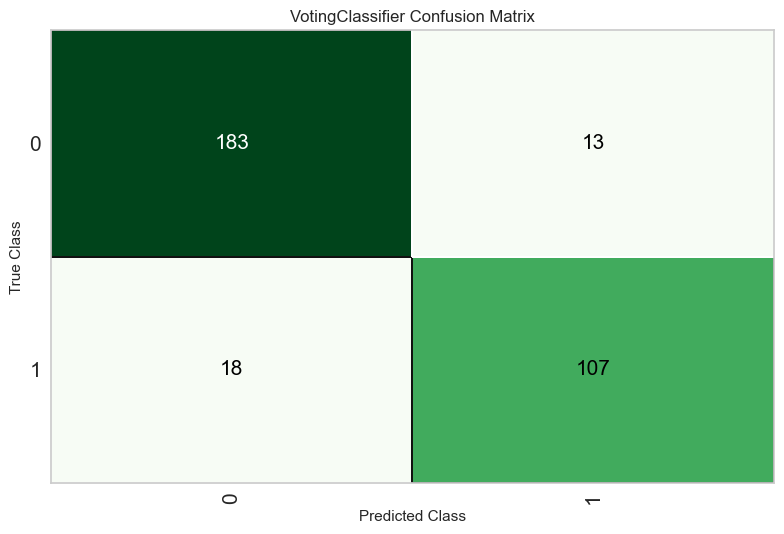

In [15]:
plot_model(final_model, plot = 'confusion_matrix')


##  prediction

- test data의 데이터 프레임 형태를 그대로 가져가며 마지막에에 Label 이라는 column이 생기고, 여기에 모델이 예측한 결과가 추가됩니다.

In [16]:
prediction = predict_model(final_model, data=dataset.iloc[-100:])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.9100,0.9704,0,0,0,0.8085,0.8131


In [17]:
prediction.columns

Index(['Id', 'WeekofPurchase', 'StoreID', 'PriceCH', 'PriceMM', 'DiscCH',
       'DiscMM', 'SpecialCH', 'SpecialMM', 'LoyalCH', 'SalePriceMM',
       'SalePriceCH', 'PriceDiff', 'Store7', 'PctDiscMM', 'PctDiscCH',
       'ListPriceDiff', 'STORE', 'Purchase', 'prediction_label',
       'prediction_score'],
      dtype='object')

## 7. 평가

- 마지막으로 모델을 평가할 차례입니다. 
- check_metric을 import 해주고, gt와 prediction을 각각 입력하고, 확인하고 싶은 metric을 입력해주면 결과값이 출력됩니다.

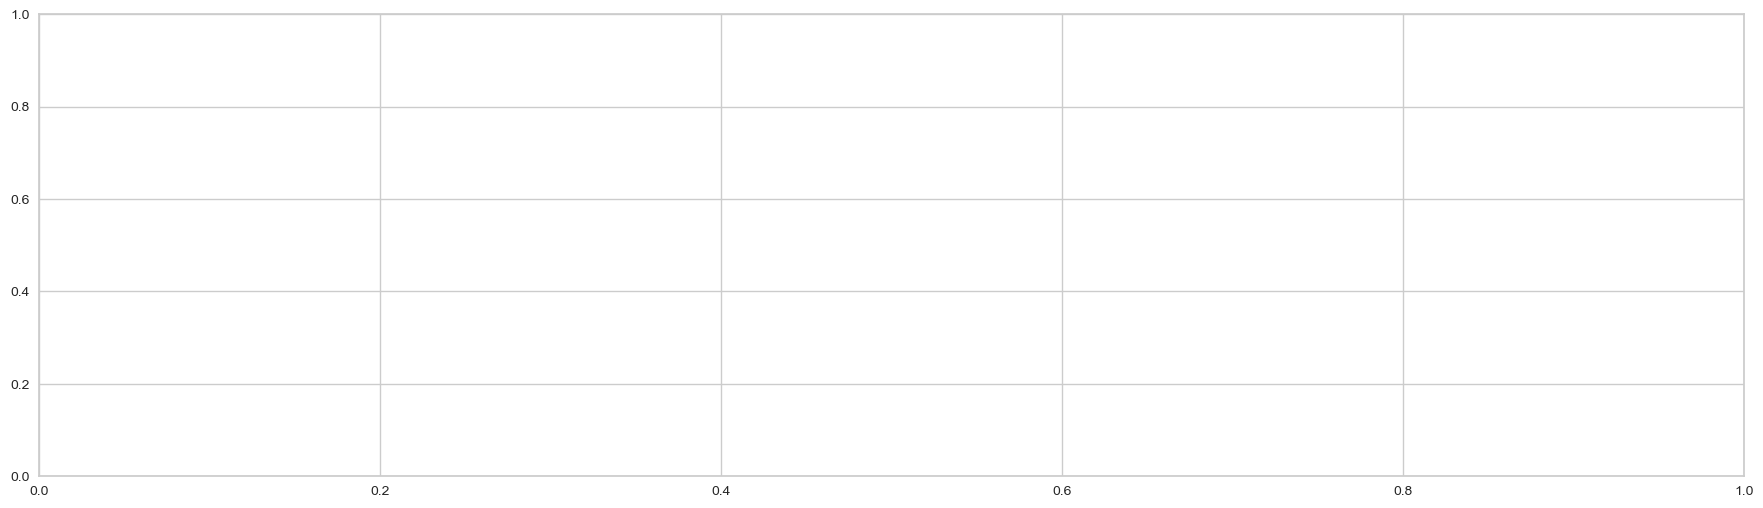

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [18]:
evaluate_model(final_model)
